# Анализ игрового сегмента на основе исторических данных интернет  магазина

<b> Шаг 1. Откройем файл с данными и изучим общую информацию

<b> Шаг 2. Предобработка данных </b>
    
<b> Шаг 3. Провести исследовательский анализ данных </b>
    
<b> Шаг 4. Составить портрет пользователя каждого региона </b>
    
<b> Шаг 5. Проверить гипотезы </b>
    
<b> Шаг 6. Общий вывод </b>

   Описание данных:    
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Первичный осмотр данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from scipy import stats as st

In [8]:
data = pd.read_csv('games.csv')

In [9]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


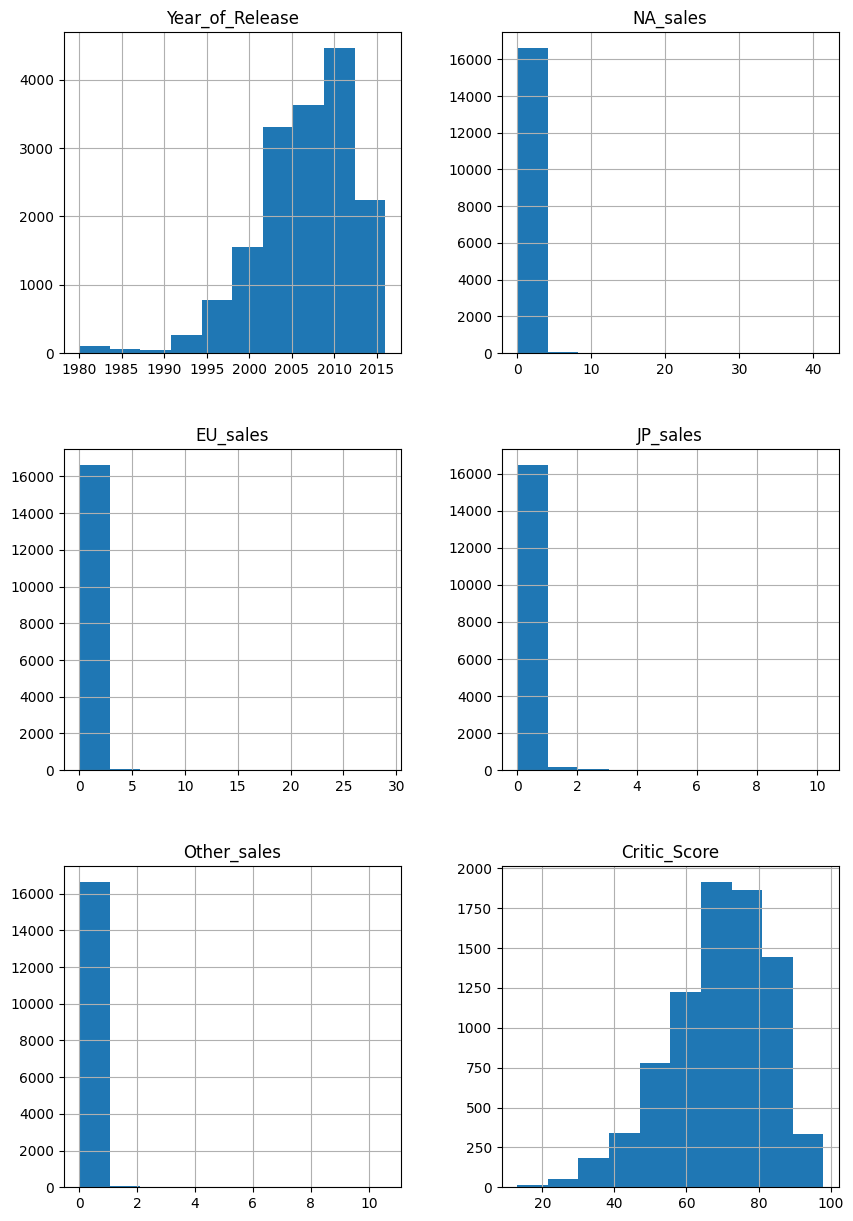

In [12]:
data.hist(figsize=(10, 15));

**В датасете лежат данные с 1980 года**

## Предобработка данных

In [13]:
data.columns = data.columns.str.lower()

In [14]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
data['year_of_release'] = data['year_of_release'].astype(int)

>Поскольку в этих столбцах не так много пропусков, проще всего их удалить

In [16]:
print(data['user_score'].unique())
data['user_score'] = data['user_score'].replace({'tbd': np.NaN})
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype(float)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


> Заменяем значение 'tbd' на пропуск, чтобы можно было изменить тип столбца, а пропуски заполняем -1 так как 0 есть в уникальных значениях этого столбца

In [17]:
print(data['rating'].unique())
data['rating'] = data['rating'].fillna('unknown')
data['rating'] = data['rating'].replace({'K-A': 'E'})

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


> Заполняем пропуски и меняем значение K-A на E так как это одна и та же категория

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).

>«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»

>«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

>«T» («Teen») — «Подросткам»

>«M» («Mature») — «Для взрослых»

>«AO» («Adults Only 18+») — «Только для взрослых»

>«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

Информация взята здесь https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [18]:
print(data['critic_score'].unique())
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype(int)

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


> Хоть тут и нет 0 в уникальных значениях, все равно решил заполнить -1

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

> Столбец с суммой продаж по всем регионам

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,30.38


В этом этапе:
- Удалены строки с пропусками в столбцах year_of_release, genre и name
- Заменил пропуски в столбцах critic_score и user_score на -1
- Пропуски в столбце rating были заменены на unknown, и значение K-A заменено на E 

## Исследовательский анализ

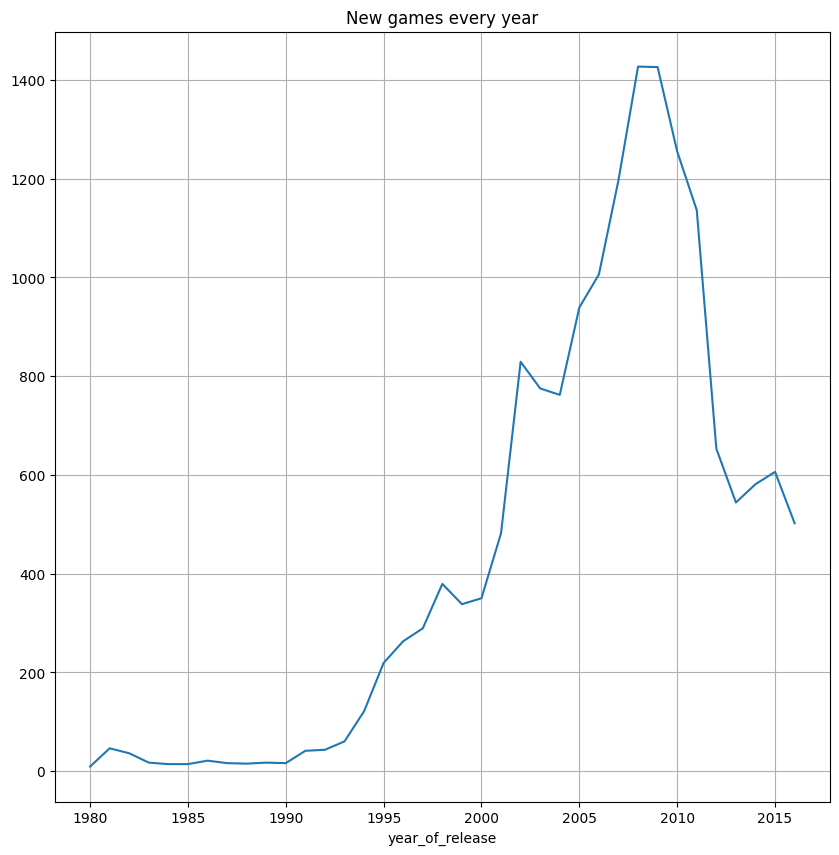

In [21]:
(
    data.groupby('year_of_release')['name'].count()
    .plot(grid=True, figsize=(10, 10), title='New games every year')
);

> С 1980 по 1993 количество выходимых игр особо не менялось

> Начиная с 1995 и до 2005 количетсво выходимых игр удваивалось каждые 5 лет

> Больше всего вышедших игр было в 2008

> С 2008 начинается падение количества выпускаемых игр вплоть до 2016 года

> Думаю данные за все периоды важны: они позволяют следить как развивалась индустрия видеоигр

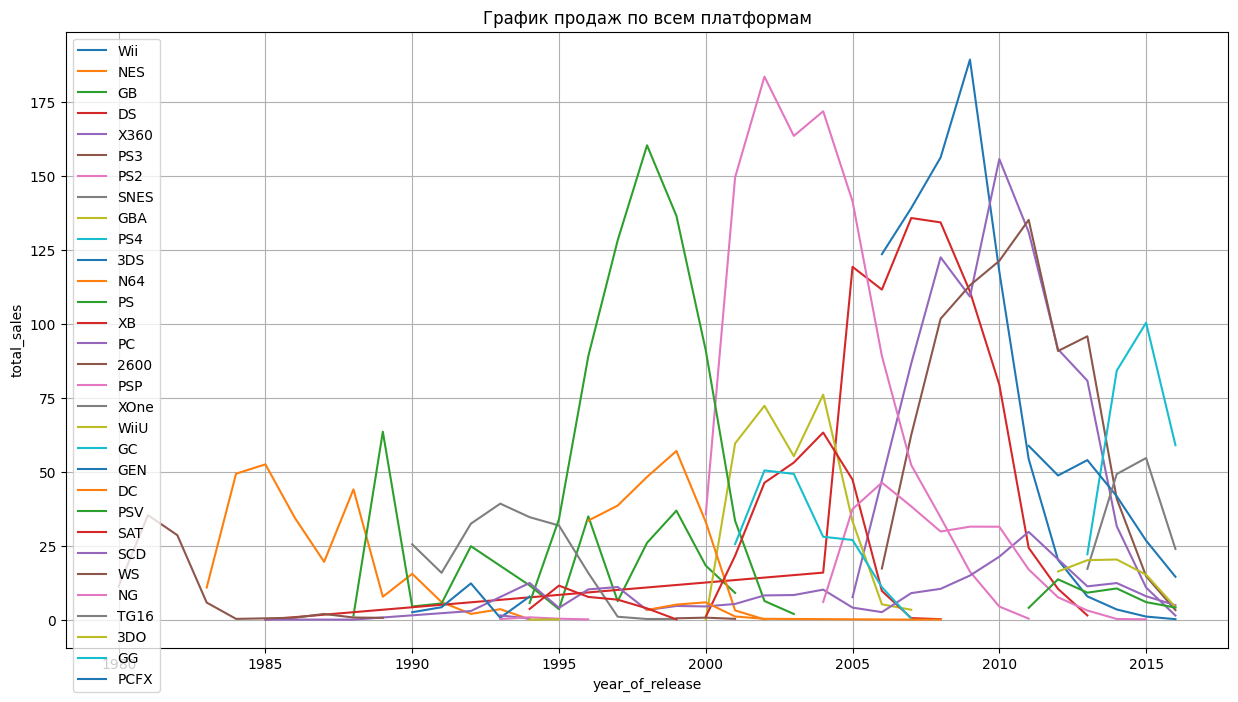

In [61]:
plt.figure(figsize=(15,8))
plt.title('График продаж по всем платформам')
plt.grid()

for x in data['platform'].unique():
    p = (
        data[data['platform'] == x]
        .groupby('year_of_release')['total_sales'].sum()
         )
    sns.lineplot(data=p, label=x)

In [23]:
platforms = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .index
)

> Список 10 самых прибыльных платформ

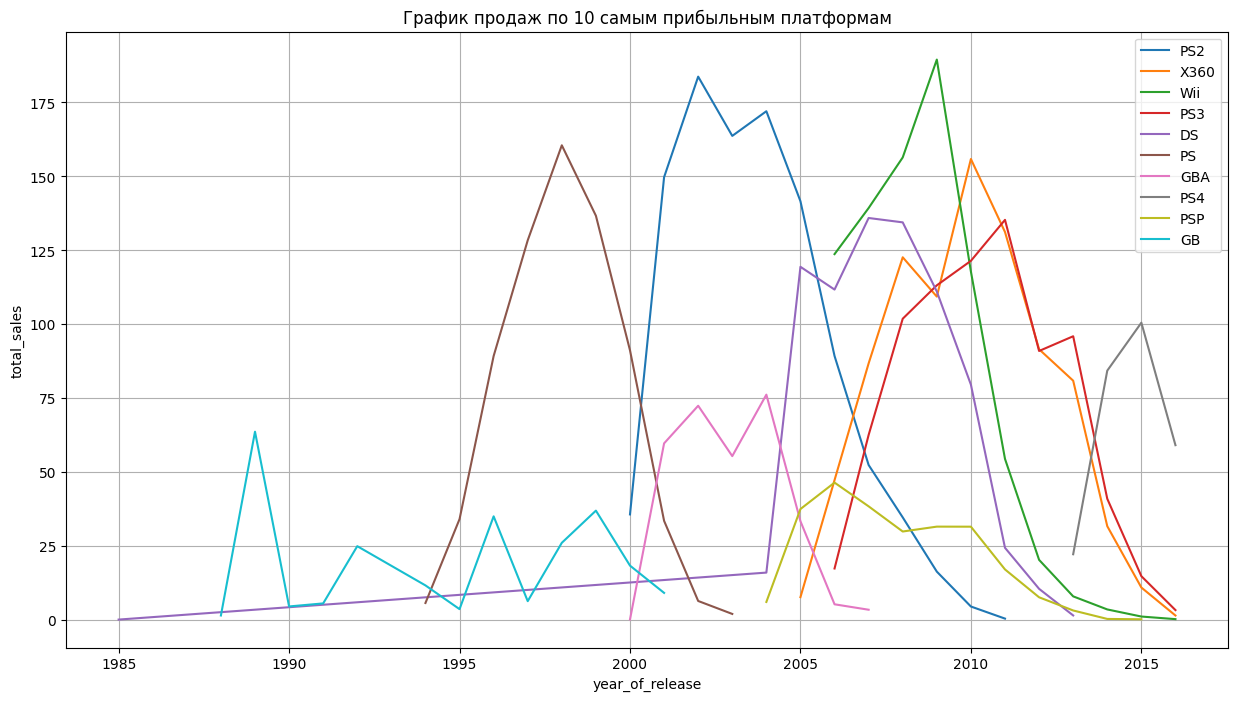

In [62]:
plt.figure(figsize=(15,8))
plt.title('График продаж по 10 самым прибыльным платформам')
plt.grid()

for x in platforms:
    p = (
        data[data['platform'] == x]
        .groupby('year_of_release')['total_sales'].sum()
         )
    sns.lineplot(data=p, label=x)

> В среднем жизненный цикл платформы занимает ~4 года

> Из этого можно предположить что более прибыльными на 2017 год будут платформы выпущенные после 2013 года 

In [25]:
all_platforms = data['platform'].unique()
new_platforms = []

for x in all_platforms:
    first_year = data[data['platform'] == x]['year_of_release'].min()
    if first_year >= 2013:
        new_platforms.append(x)

> Список платформ выпущенных после 2013 года

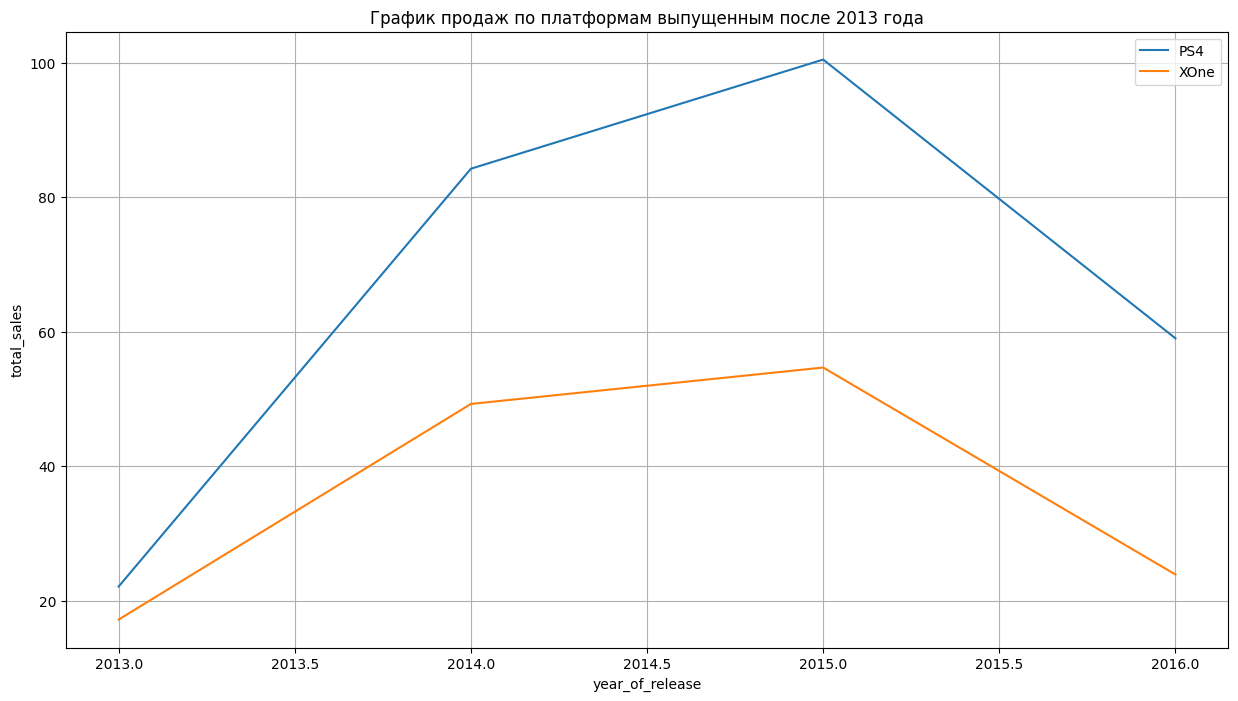

In [63]:
plt.figure(figsize=(15,8))
plt.title('График продаж по платформам выпущенным после 2013 года')
plt.grid()

for x in new_platforms:
    p = (
        data[data['platform'] == x]
        .groupby('year_of_release')['total_sales'].sum()
         )
    sns.lineplot(data=p, label=x)

> Самой прибыльной из платформ выпущенных после 2013 года является PS4

> Однако у всех платформ после 2015 года падают продажи

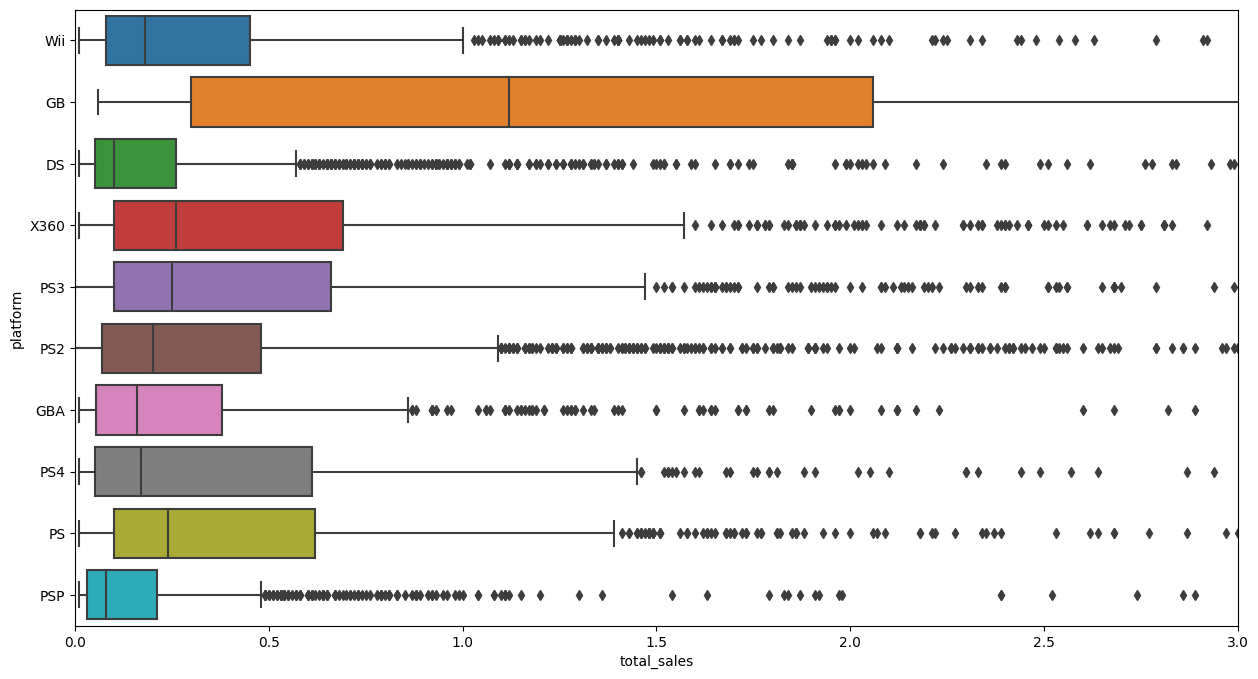

In [27]:
plt.figure(figsize=(15,8))
plt.title('Boxplot график продаж по всем платформам')
plt.xlim(0, 3)

sns.boxplot(
    y='platform',
    x='total_sales',
    data=data[data['platform'].isin(platforms)]
);

> Медиана продаж у большинства самых прибыльных платформ лежит окола 0.25 

> Исключение составляет платформа GB с медианным значением продаж около 1

0.12603338123578753


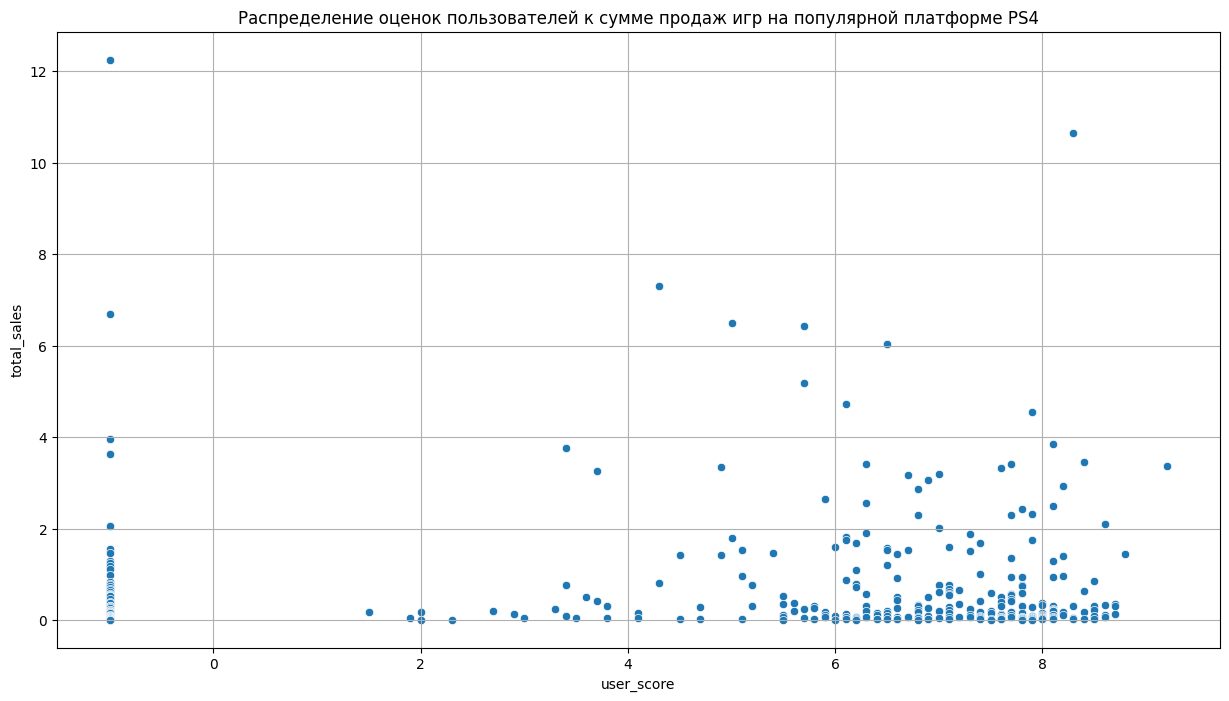

In [66]:
plt.figure(figsize=(15,8))
plt.title('Распределение оценок пользователей к сумме продаж игр на популярной платформе PS4')
plt.grid()

sns.scatterplot(
    x = 'user_score',
    y = 'total_sales',
    data=data[data['platform'] == 'PS4']
);
print(data['total_sales'].corr(data['user_score']))

0.13892397056579509


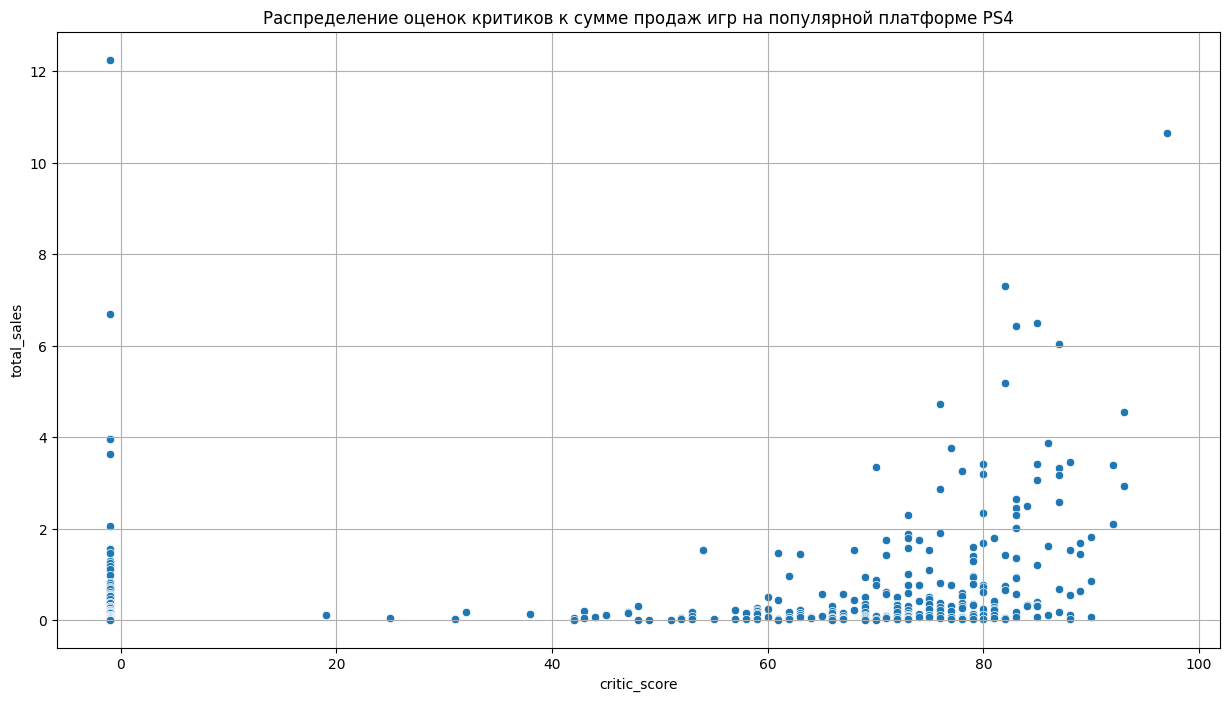

In [67]:
plt.figure(figsize=(15,8))
plt.title('Распределение оценок критиков к сумме продаж игр на популярной платформе PS4')
plt.grid()

sns.scatterplot(
    x = 'critic_score',
    y = 'total_sales',
    data=data[data['platform'] == 'PS4']
);
print(data['total_sales'].corr(data['critic_score']))

> Зависимости между оценками пользователей и критиков на продажи не обнаружено

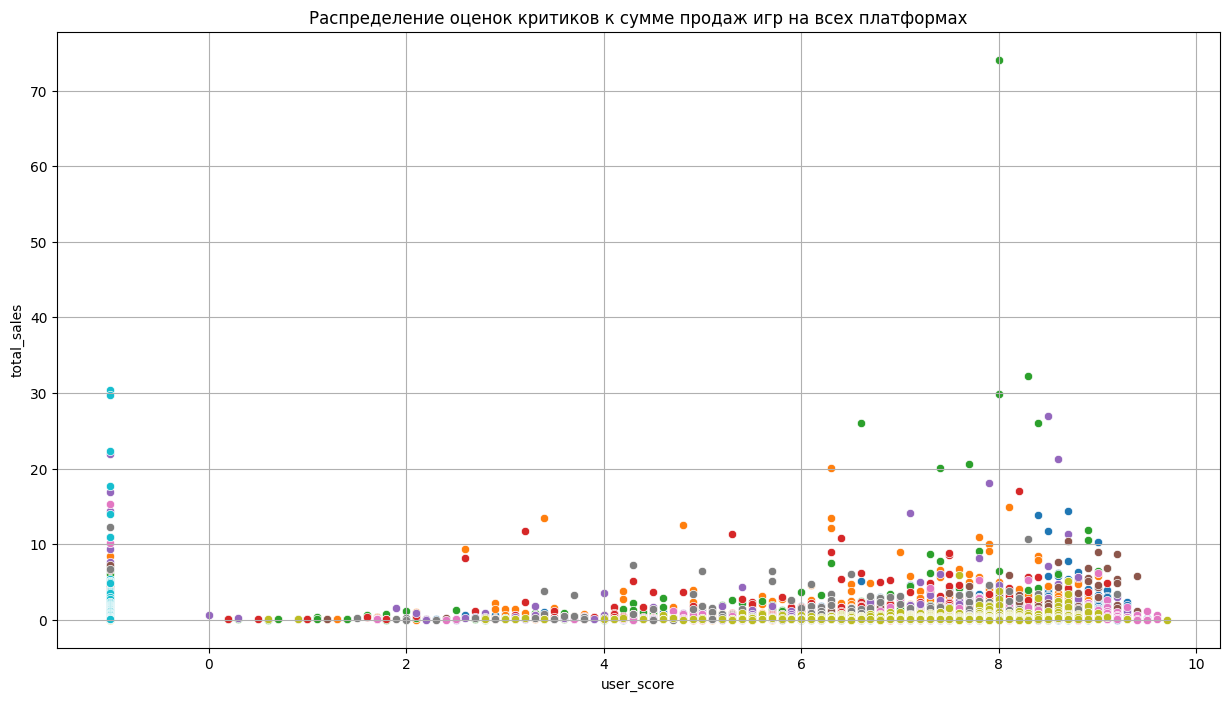

In [68]:
plt.figure(figsize=(15,8))
plt.title('Распределение оценок критиков к сумме продаж игр на всех платформах')
plt.grid()

for x in platforms:
    sns.scatterplot(
        x = 'user_score',
        y = 'total_sales',
        data=data[data['platform'] == x]
    );

> На остальных платформах связь между оценками и итоговыми продажами тоже не заметна

### Анализ успешности жанров после 2013 года

In [31]:
new_games = data[data['year_of_release'] >= 2013]

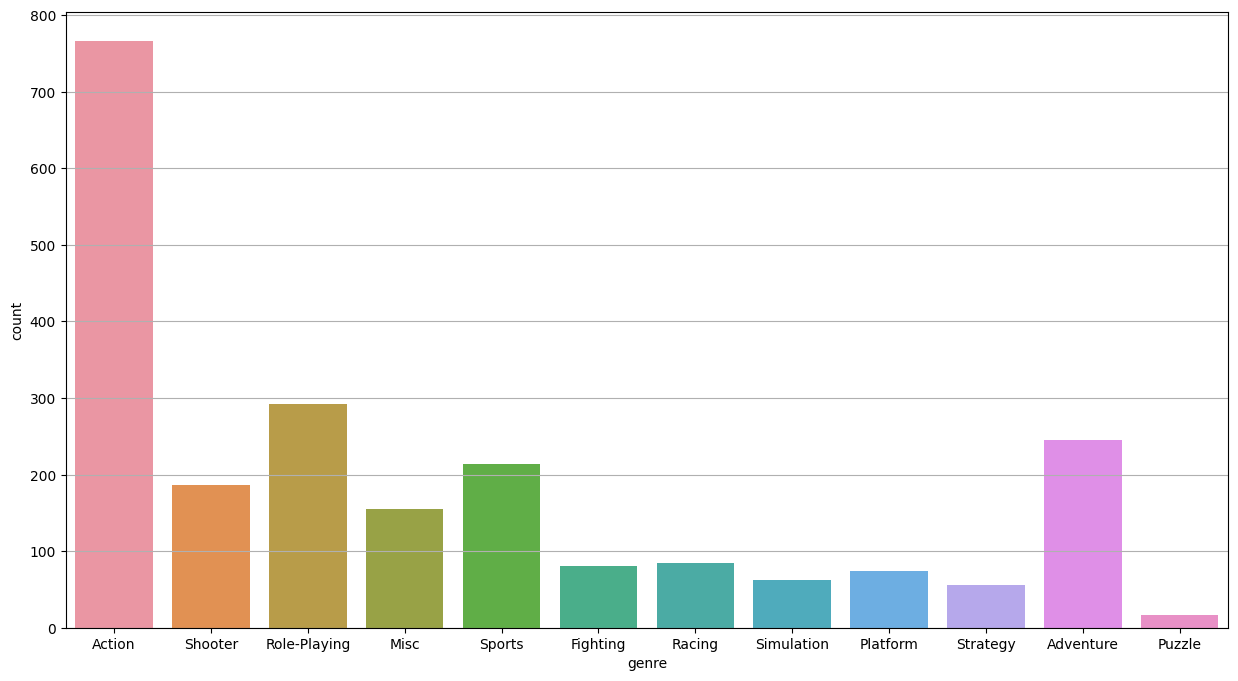

In [56]:
plt.figure(figsize=(15,8))
plt.title('Количество вышедших игр по жанрам после 2013')
plt.grid()

sns.countplot(x='genre', data=new_games);

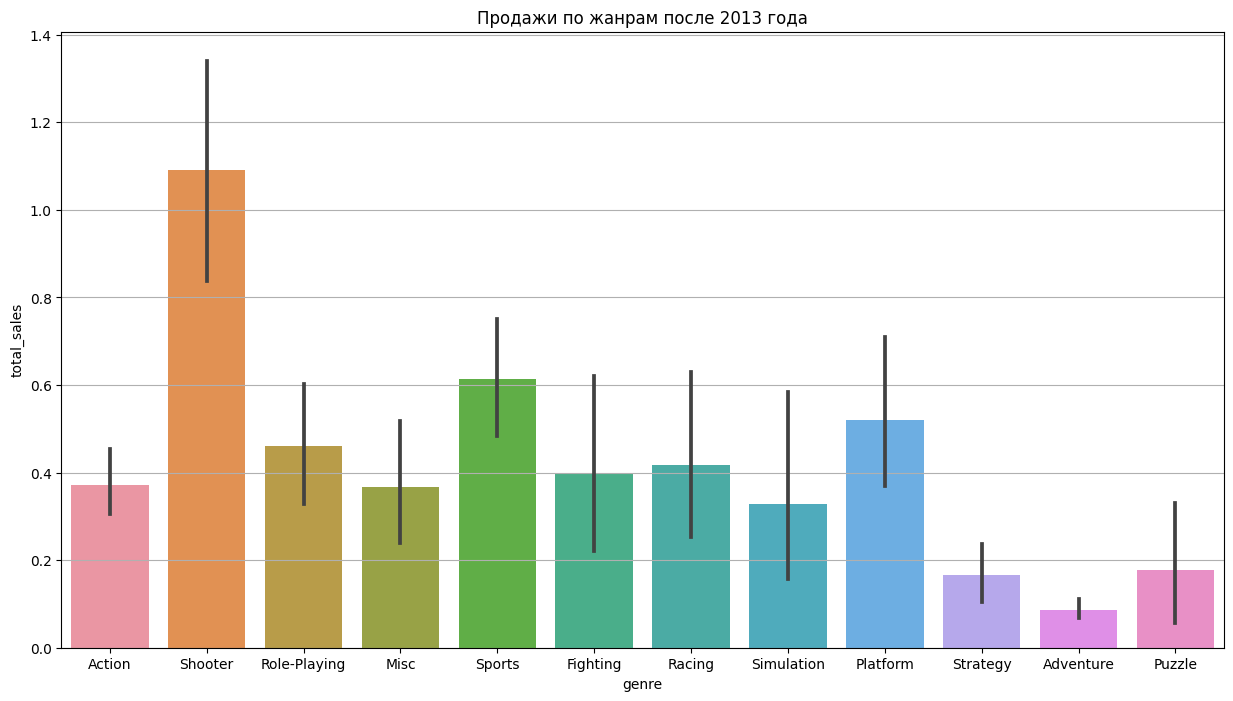

In [69]:
plt.figure(figsize=(15,8))
plt.title('Продажи по жанрам после 2013 года')
plt.grid()

sns.barplot(data=new_games, x='genre', y='total_sales');

> Чаще всего выпускали игры в жанре Action, но медианное значение продаж не сильно отличается от других жанров
    
> Самые высокие медианные продажи у жанра Shooter

## Портрет пользователя 

### Продажи по платформам в разных регионах

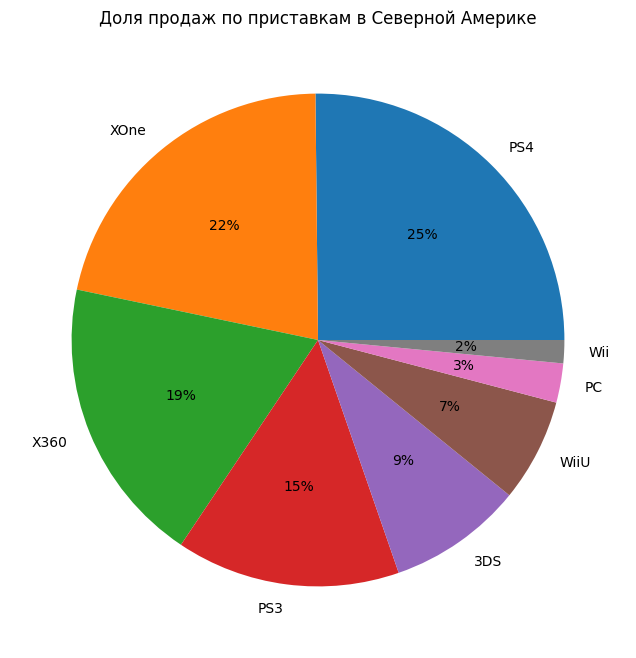

In [34]:
na_platforms = new_games.pivot_table(index='platform', values='na_sales', aggfunc=sum) \
    .sort_values(by='na_sales', ascending=False) \
    .head(8)

plt.figure(figsize=(15,8))
plt.title('Доля продаж по приставкам в Северной Америке')
plt.pie(na_platforms['na_sales'], labels=na_platforms.index, autopct='%.f%%');

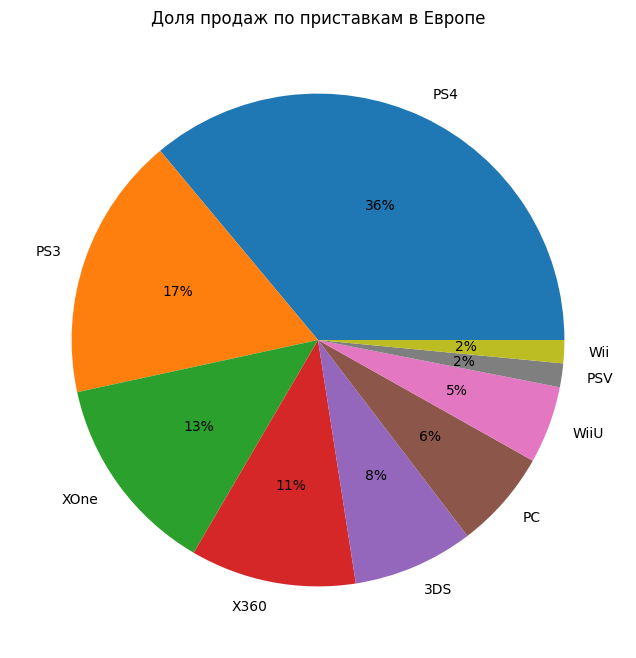

In [35]:
eu_platforms = new_games.pivot_table(index='platform', values='eu_sales', aggfunc=sum) \
    .sort_values(by='eu_sales', ascending=False) \
    .head(9)

plt.figure(figsize=(15,8))
plt.title('Доля продаж по приставкам в Европе')
plt.pie(eu_platforms['eu_sales'], labels=eu_platforms.index, autopct='%.f%%');

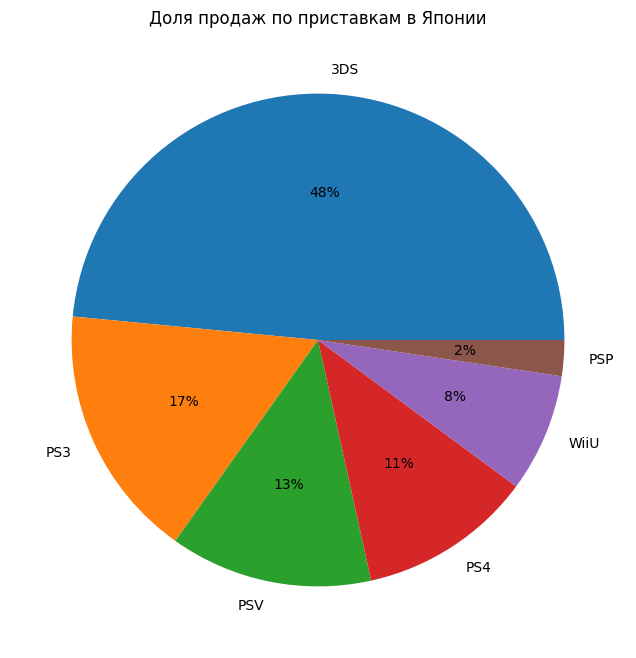

In [36]:
jp_platforms = new_games.pivot_table(index='platform', values='jp_sales', aggfunc=sum) \
    .sort_values(by='jp_sales', ascending=False) \
    .head(6)

plt.figure(figsize=(15,8))
plt.title('Доля продаж по приставкам в Японии')
plt.pie(jp_platforms['jp_sales'], labels=jp_platforms.index, autopct='%.f%%');

**Вывод:**
- С 2013 года в Японии лучше всего продавались игры на платформе 3DS
    
- В Европе большей популярностью пользуются игры на линейке платформ Playstation, чем Xbox (51% против 24% соответственно)
    
- В Северной Америке линейки Playstation и Xbox примерно популярны (40% и 41% соответственно)

### Продажи по жанрам в разных регионах

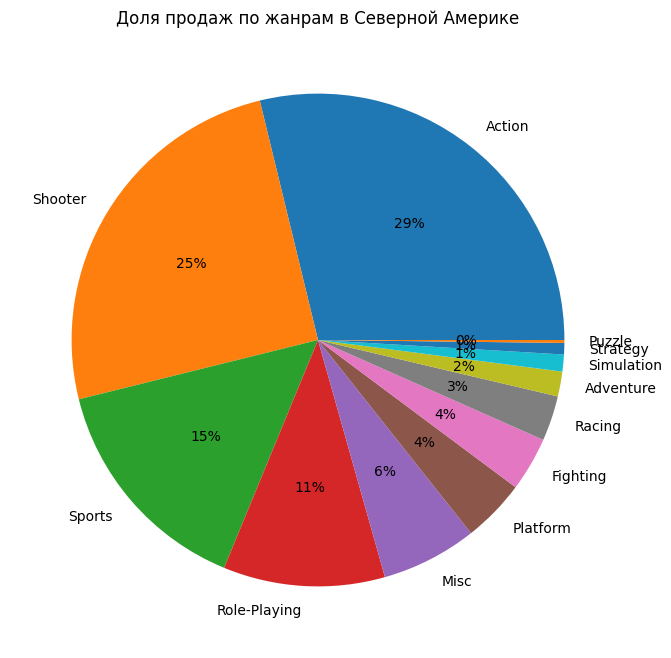

In [37]:
na_genres = new_games.pivot_table(index='genre', values='na_sales', aggfunc=sum) \
    .sort_values(by='na_sales', ascending=False)

plt.figure(figsize=(15,8))
plt.title('Доля продаж по жанрам в Северной Америке')
plt.pie(na_genres['na_sales'], labels=na_genres.index, autopct='%.f%%');

 **Самые популярные жанры:**
- Action 29%
- Shooter 25%
- Sports 15%
- Role-Playing 11%
- Misc 6%

Продажи 5 самых популярных жанров составляют 86% от всех продаж в этом регионе

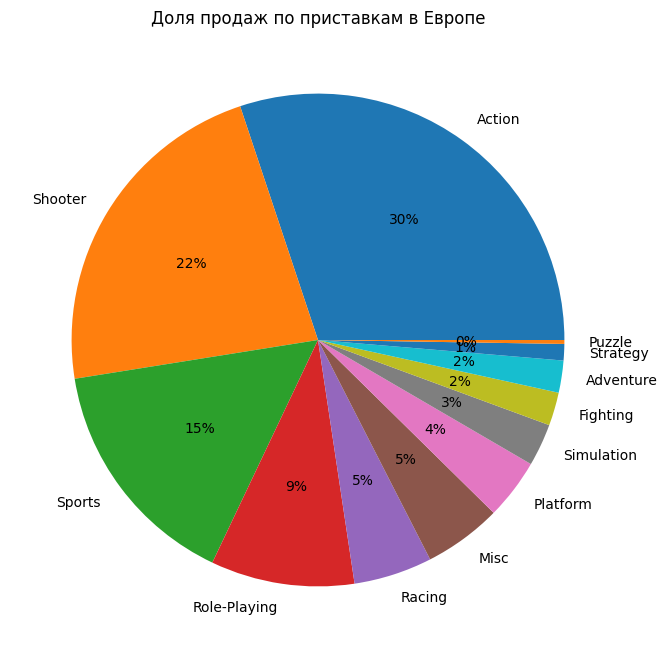

In [38]:
eu_genres = new_games.pivot_table(index='genre', values='eu_sales', aggfunc=sum) \
    .sort_values(by='eu_sales', ascending=False) 

plt.figure(figsize=(15,8))
plt.title('Доля продаж по приставкам в Европе')
plt.pie(eu_genres['eu_sales'], labels=eu_genres.index, autopct='%.f%%');

 **Самые популярные жанры:**
- Action 30%
- Shooter 22%
- Sports 15%
- Role-Playing 9%
- Racing 5%

Продажи 5 самых популярных жанров составляют 81% от всех продаж в этом регионе

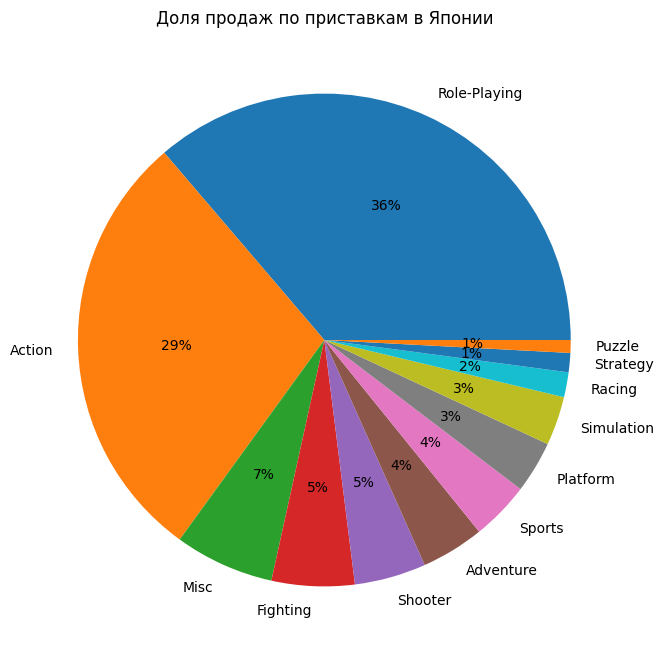

In [39]:
jp_genres = new_games.pivot_table(index='genre', values='jp_sales', aggfunc=sum) \
    .sort_values(by='jp_sales', ascending=False) 

plt.figure(figsize=(15,8))
plt.title('Доля продаж по приставкам в Японии')
plt.pie(jp_genres['jp_sales'], labels=jp_genres.index, autopct='%.f%%');

 **Самые популярные жанры:**
- Role-Playing 36%
- Action 29%
- Misc 7%
- Fighting 5%
- Shooter 5%

Продажи 5 самых популярных жанров составляют 82% от всех продаж в этом регионе

Вывод:
- В среднем в Европе и Северной Америке чаще играют в Action и Shooter, в Японии в Action и Role-Playing

### Влияние рейтинга ESRB на продажи игр 

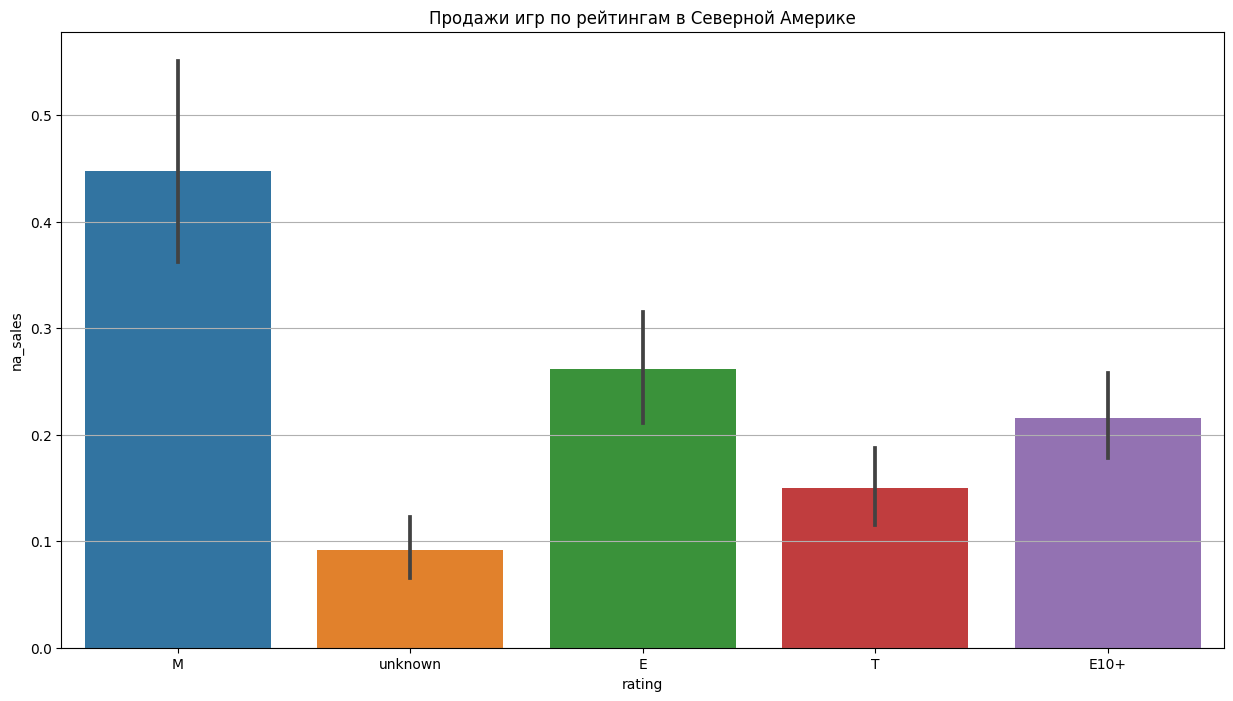

In [58]:
plt.figure(figsize=(15,8))
plt.grid()
plt.title('Продажи игр по рейтингам в Северной Америке')
sns.barplot(data=new_games, x='rating', y='na_sales');

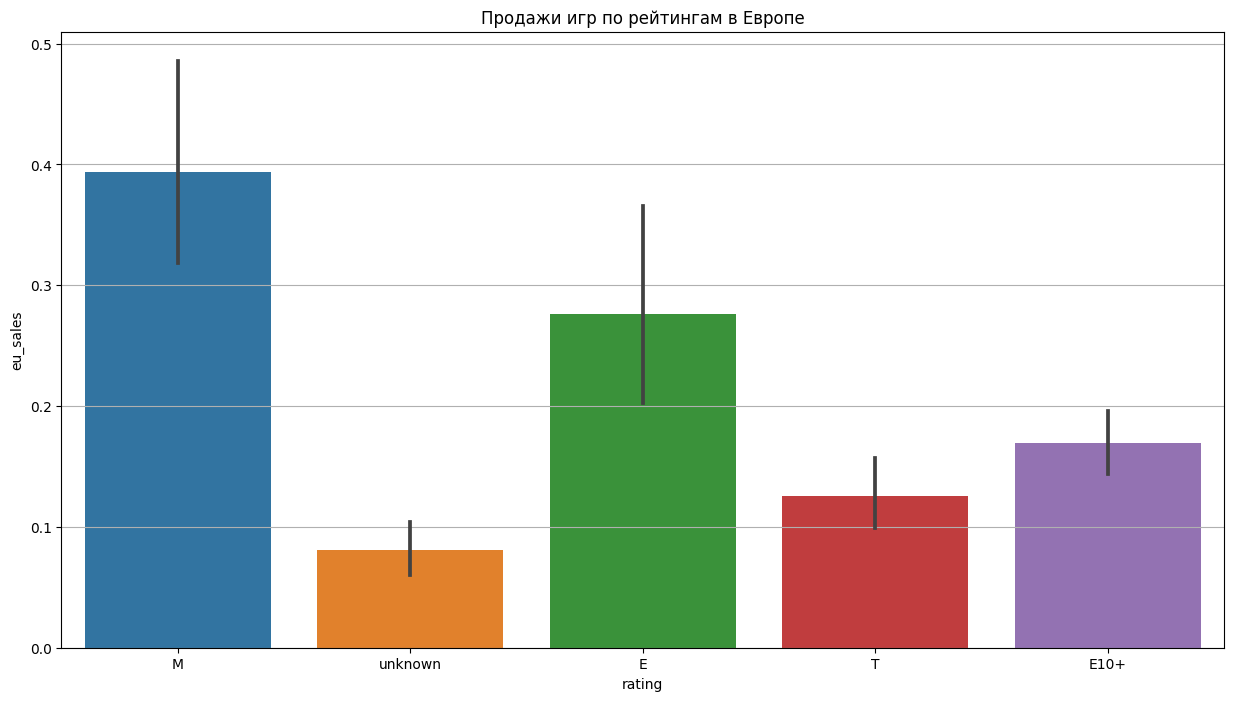

In [59]:
plt.figure(figsize=(15,8))
plt.grid()
plt.title('Продажи игр по рейтингам в Европе')
sns.barplot(data=new_games, x='rating', y='eu_sales');

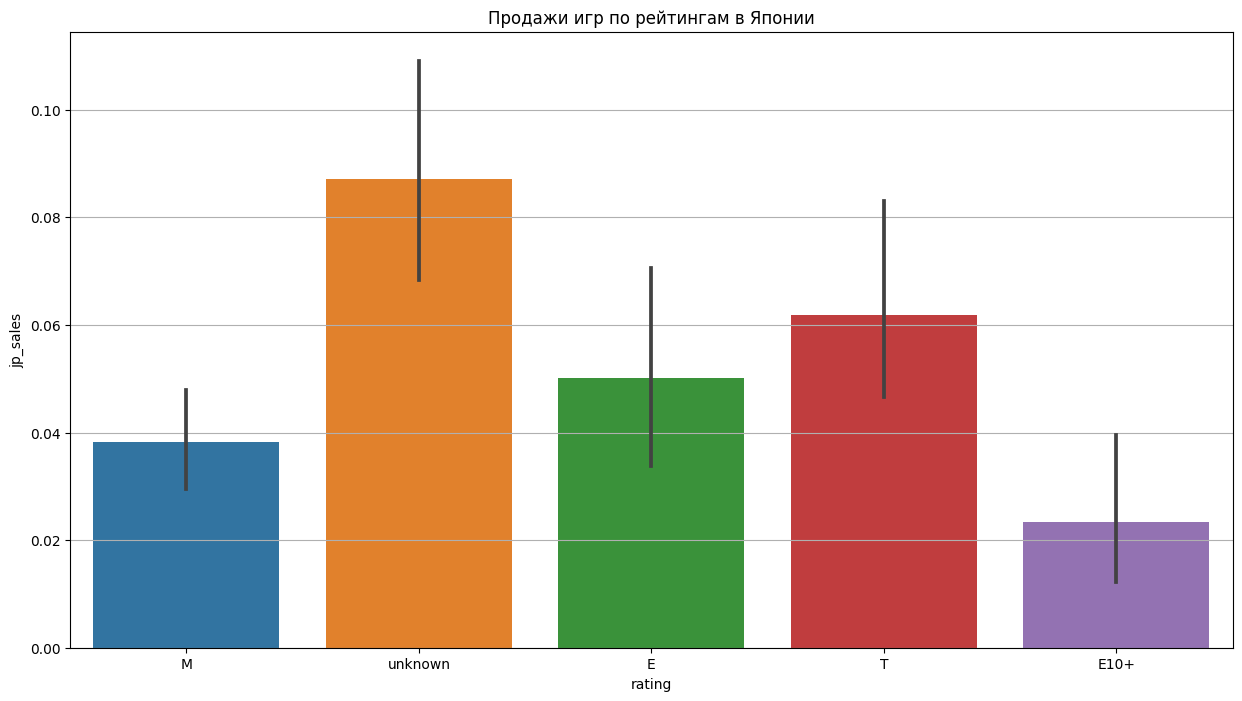

In [60]:
plt.figure(figsize=(15,8))
plt.grid()
plt.title('Продажи игр по рейтингам в Японии')
sns.barplot(data=new_games, x='rating', y='jp_sales');

**Вывод**: 
- Если предположить что все пропуски в значении рейтинга были связаны с отсутсвием проставленного рейтинга, то можно сказать что выставленный рейтинг влияет на продажи в Северной Америке и Европе, так как в этих регионах сумма продаж игр с рейтингоми выше продаж игр без рейтинга

## Проверка гипотез

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны

> H0: средние рейтинги по платформам одинаковые

> H1: средние рейтинги по платформам разные

In [43]:
clear_scores = data[data['user_score'] != -1]

xone_data = clear_scores[clear_scores['platform'] == 'XOne']
pc_data = clear_scores[clear_scores['platform'] == 'PC']

Делаем два датасета по платформам без заполненных пропусков для большой точности

In [44]:
results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var = True)
alpha = .05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.3037979620149106e-05
Отвергаем нулевую гипотезу


### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

> H0: средние рейтинги по жанрам одинаковые

> H1: средние рейтинги по жанрам разные

In [45]:
action = clear_scores[clear_scores['genre'] == 'Action']
sports = clear_scores[clear_scores['genre'] == 'Sports']

In [46]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = True)
alpha = .05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


## Вывод

- В тренде на 2017 год остаются две платформы PS4 и Xbox One

- Скорее всего высокие продажи будут в жанрах Action, Shooter и Role-Playing

- В Японии продажи по жанрам Action и Role-Playing составляют 65% продаж по всему региону 

- В Европе и Северной Америке самые высокие продажи будут по рейтингу E

- Самой популярной платформой Японии является PS4 - 98% 

- Cредние рейтинги по платформам Xbox One и PC разные